# time sync

In [43]:
import ephem
import matplotlib.pyplot as plt

In [44]:
u = ephem.Uranus()
u.compute('1781/3/13') 
print('%s %s %s' % (u.ra, u.dec, u.mag))

5:35:45.28 23:32:54.1 5.6


In [45]:
print(ephem.constellation(u))

('Tau', 'Taurus')


TLE from norad 

    GALASSIA                
    1 41170U 15077E   18291.47886069  .00002035  00000-0  73075-4 0  9998
    2 41170  14.9881 191.7979 0013088 334.9563  25.0122 15.13422614157130
    
    NUS observation locatoin
    1.2954752,103.7800079

In [47]:
my_loc = ephem.Observer()
my_loc.lat = '1.2954752'
my_loc.lon = '103.7800079'
my_loc.elevation = 100

In [87]:
name = 'GALASSIA'
line1 = '1 41170U 15077E   18291.47886069  .00002035  00000-0  73075-4 0  9998'
line2 = '2 41170  14.9881 191.7979 0013088 334.9563  25.0122 15.13422614157130'
#name = "ISS (ZARYA)"             
#line1 ="1 25544U 98067A   18345.71766725  .00004176  00000-0  70390-4 0  9993"
#line2 = "2 25544  51.6422 214.0093 0005343 137.0686 327.4053 15.54088385146122"
my_sat = ephem.readtle(name,line1,line2)

In [88]:
info=my_loc.next_pass(my_sat)

    AOS stands for Acquisition of Signal
    TCA stands for Time of Closest Approach
    LOS stands for Loss of Signal (or Satellite)
    info []
    0  Rise time
    1  Rise azimuth
    2  Maximum altitude time (TCA- time of closed approach)
    3  Maximum altitude
    4  Set time
    5  Set azimuth
    
 All PyEphem dates are expressed in Universal Time (UTC)

In [67]:

print("AOS: %s \nLOS: %s \nMaximum Altitude: %s \nMaximum Altitude Time: %s" % (info[0], info[4], info[3], info[2]))

AOS: 2018/12/12 14:51:32 
LOS: 2018/12/12 15:01:07 
Maximum Altitude: 7:48:35.3 
Maximum Altitude Time: 2018/12/12 14:56:20


Saved pass

    AOS: 2018/10/19 06:34:18
    
    LOS: 2018/10/19 06:46:09 
    
    Maximum Altitude: 20:46:07.2 
    
    Maximum Altitude Time (TCA): 2018/10/19 06:40:12
    

In [8]:
info

(43443.91660355808,
 4.95688533782959,
 43443.92114076009,
 1.382979393005371,
 43443.92569235205,
 1.8840051889419556)

In [9]:
type(info[0])

ephem.Date

In [10]:
tca = info[4]

In [51]:
my_sat.compute(my_loc)
print("Range velocity: %s " % (my_sat.range_velocity))

Range velocity: -4484.29833984375 


In [68]:
my_loc.date = ephem.Date(tca - (ephem.minute *6))
#my_loc.date = info[0] + (ephem.minute *6)
#my_loc.date=ephem.Date('2018/10/19 06:40:12')

In [69]:
my_sat.compute(my_loc)
print("Range velocity: %s " % (my_sat.range_velocity))

Range velocity: 2638.900634765625 


In [70]:
d = ephem.Date('2018/10/19 06:40:12')
nd = d + (ephem.minute * 3)

In [71]:
print (ephem.Date(nd) )

2018/10/19 06:43:12


In [16]:
ephem.localtime(d)

datetime.datetime(2018, 10, 19, 14, 40, 12, 4)

In [17]:
aos = (ephem.Date("2018/10/19 04:52:24") - ephem.minute* 10)

In [18]:
print(aos)

43390.69611111111


In [19]:
my_loc.date = ephem.Date(aos)

In [20]:
print (my_loc.date)

2018/10/19 04:42:24


In [21]:
my_loc.date = ephem.Date("2018/10/19 04:45:13")

In [22]:
my_sat.compute(my_loc)
print("Range velocity: %s " % (my_sat.range_velocity))

Range velocity: -6223.44287109375 


In [23]:
my_sat.range /1000

5384.4335

In [24]:
print (my_sat.alt)

-18:49:06.2


In [92]:
#for galassia
start_time = ephem.Date('2018/10/19 04:53:01') +ephem.second * 75

#for ISS
#start_time = ephem.Date('2018/12/12 13:32:47') - ephem.second * 200

In [93]:
v_list = []
t_list = []
alt_list = []
for i in range (700):
    d_time = ephem.Date(start_time + (ephem.second * i  ) )
    my_loc.date = d_time
    my_sat.compute(my_loc)
    v_list.append(my_sat.range_velocity)
    t_list.append(d_time)
    alt_list.append(my_sat.alt) 

In [94]:
ephem.second

1.1574074074074073e-05

In [95]:
f = 1e9

In [96]:
print(alt_list[400])

21:29:19.8


In [97]:
df_list = []
nt_list = [(x - start_time)*24*60*60 for x in t_list]
for dv in v_list:
    df = -(dv /ephem.c) * f
    df_list.append(df)

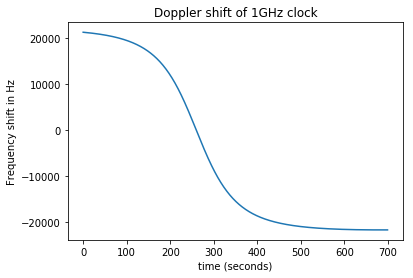

In [98]:
plt.plot(nt_list,df_list, label="1GHz")
plt.title('Doppler shift of 1GHz clock')
plt.xlabel("time (seconds)")
plt.ylabel('Frequency shift in Hz')
plt.savefig("DopplerShift1GHz.png") 
plt.show()

In [99]:
f45 = 4.5e6

In [117]:
df45_list = []
nt_list = [(x - start_time)*24*60*60 for x in t_list]
for dv in v_list:
    df = -(dv /ephem.c) * f45
    df45_list.append(df)



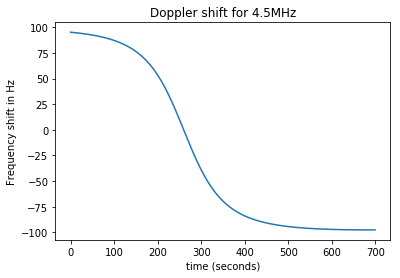

In [101]:
plt.plot(nt_list,df45_list, label="4.5MHz")
plt.title('Doppler shift for 4.5MHz')
plt.xlabel("time (seconds)")
plt.ylabel('Frequency shift in Hz')
plt.savefig("DopplerShift45.png") 
plt.show()

In [102]:
1e9 / 4.5e6

222.22222222222223

In [103]:
f436 = 436.2e6
df436_list = []
#nt_list = [(x - start_time)*24*60*60 for x in t_list]
for dv in v_list:
    df = -(dv /ephem.c) * f436
    df436_list.append(df)



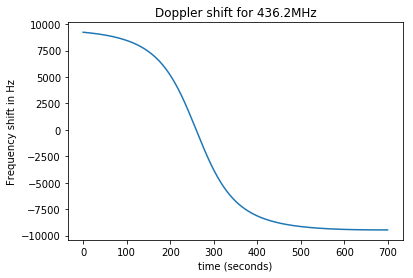

In [104]:
plt.plot(nt_list,df436_list, label="436.2MHz")
plt.title('Doppler shift for 436.2MHz')
plt.xlabel("time (seconds)")
plt.ylabel('Frequency shift in Hz')
plt.savefig("DopplerShift436.png") 
plt.show()

In [106]:
name = "ISS (ZARYA)"             
line1 ="1 25544U 98067A   18345.71766725  .00004176  00000-0  70390-4 0  9993"
line2 = "2 25544  51.6422 214.0093 0005343 137.0686 327.4053 15.54088385146122"
my_sat = ephem.readtle(name,line1,line2)

In [124]:
#for ISS pass with max ElV: 78.63 degree 
start_time = ephem.Date('2018/12/12 13:32:47') - ephem.second * 75

In [125]:
v_list = []
t_list = []
alt_list = []
for i in range (700):
    d_time = ephem.Date(start_time + (ephem.second * i  ) )
    my_loc.date = d_time
    my_sat.compute(my_loc)
    v_list.append(my_sat.range_velocity)
    t_list.append(d_time)
    alt_list.append(my_sat.alt) 

In [126]:
f436 = 436.2e6
df436_list = []
nt_list = [(x - start_time)*24*60*60 for x in t_list]
for dv in v_list:
    df = -(dv /ephem.c) * f436
    df436_list.append(df)


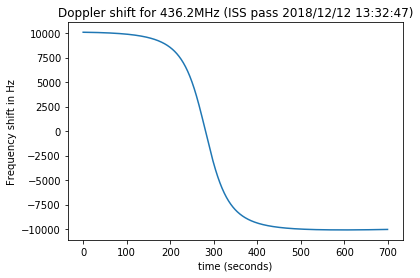

In [128]:
plt.plot(nt_list,df436_list, label="436.2MHz")
plt.title('Doppler shift for 436.2MHz (ISS pass 2018/12/12 13:32:47)')
plt.xlabel("time (seconds)")
plt.ylabel('Frequency shift in Hz')
plt.savefig("DopplerShiftISS436.png") 
plt.show()